# TensorFlow: Logistic Regression

## Importing Modules

In [1]:
import tensorflow as tf
import numpy as np

## Loading and Preparing the MNIST Data Set

MNIST data is a collection of hand-written digits that contains 60,000 examples for training and 10,000 examples for testing.

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Flatten images to 1-D vector of 784 features (28*28).
num_features = 28*28

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

In [3]:
x_train.shape

(60000, 784)

In [4]:
x_test.shape

(10000, 784)

## Setting Parameters

In [5]:
# MNIST dataset parameters
num_classes = 10 # 0 to 9 digits

# Training parameters
learning_rate = 0.01
training_steps = 10000
batch_size = 256
display_step = 100

## Shuffling and Batching Data

In [6]:
# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))

train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

## Initializing Weights and Biases

In [7]:
# Weight of shape [784, 10], the 28*28 image features, and a total number of classes.
W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")

# Bias of shape [10], the total number of classes.
b = tf.Variable(tf.zeros([num_classes]), name="bias")

## Cost Function

A cost function calculates the error between actual and predicted values.

In [8]:
# Logistic regression (Wx + b).
def logistic_regression(x):
    # Apply softmax to normalize the logits to a probability distribution.
    return tf.nn.softmax(tf.matmul(x, W) + b)


# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)

    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

## Optimizers and Accuracy Metrics

In [9]:
# Accuracy metric.
def accuracy(y_pred, y_true):
# Predicted class is the index of the highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

## Updating Weights and Biases

In [10]:
# Optimization process. 
def run_optimization(x, y):
# Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:

        pred = logistic_regression(x)

        loss = cross_entropy(pred, y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])

    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

## Training

In [11]:
# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):

    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)

    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 100, loss: 519.167969, accuracy: 0.863281
step: 200, loss: 738.987244, accuracy: 0.804688
step: 300, loss: 530.781494, accuracy: 0.835938
step: 400, loss: 517.976379, accuracy: 0.855469
step: 500, loss: 39.550777, accuracy: 0.960938
step: 600, loss: 74.677307, accuracy: 0.917969
step: 700, loss: 59.396957, accuracy: 0.925781
step: 800, loss: 56.650833, accuracy: 0.929688
step: 900, loss: 47.108589, accuracy: 0.937500
step: 1000, loss: 59.829865, accuracy: 0.898438
step: 1100, loss: 73.249832, accuracy: 0.917969
step: 1200, loss: 54.066582, accuracy: 0.925781
step: 1300, loss: 378.722137, accuracy: 0.730469
step: 1400, loss: 33.758072, accuracy: 0.960938
step: 1500, loss: 99.390778, accuracy: 0.910156
step: 1600, loss: 47.263832, accuracy: 0.957031
step: 1700, loss: 62.820263, accuracy: 0.925781
step: 1800, loss: 76.750786, accuracy: 0.910156
step: 1900, loss: 99.906105, accuracy: 0.906250
step: 2000, loss: 131.545486, accuracy: 0.867188
step: 2100, loss: 69.679062, accuracy: 0.95

## Model Accuracy

In [12]:
# Test model on validation set.
pred = logistic_regression(x_test)

print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.904300


## Aplication model

In [13]:
import matplotlib.pyplot as plt

0: 0.0111 %
1: 0.1403 %
2: 57.9664 %
3: 37.1922 %
4: 0.0002 %
5: 0.0541 %
6: 0.0521 %
7: 0.0001 %
8: 4.5832 %
9: 0.0002 %


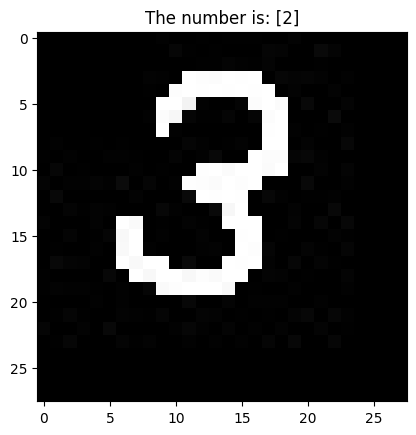

In [14]:
my_image = plt.imread('img/my/number1.jpg', format='jpeg')
plt.imshow(my_image)

# flatten images into one-dimensional vector
num_pixels = my_image.shape[0] * my_image.shape[1] # find size of one-dimensional vector

# Grayscale + Unit RGB
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 

test_image = np.array([gray(my_image)])

plt.imshow(test_image[0])

# flatten images into one-dimensional vector
test_image = test_image.reshape(test_image.shape[0], num_pixels).astype('float32')
test_image = test_image / 255

# Predict
result = logistic_regression(test_image)

for i, v in enumerate(result[0]):
    print(f'{i}: {v*100:.4f} %')

# Result image
image = np.reshape(my_image, (-1, 1))
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f'The number is: {tf.math.argmax(result, 1)}')
plt.show()